- Author: Maximiliano Lopez Salgado
- First Commit: 2023-06-20                      #folowing ISO  8601 Format
- Last Commit: 2023-07-07                       #folowing ISO  8601 Format
- Description: This notebook is used to perform EDA on the Superstore dataset

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Machine Learning

This jupyter notebook is meant to perform a basic, but useful ML model. We will be performing the next actions:

**Importing Data**

- Read the "superstore_df.csv" file into a DataFrame named "superstore_df".
- Display the head, information, and summary statistics of the "superstore_df" DataFrame.

**Exploratory Data Analysis**

- Visualize correlations between variables using a heatmap.

**Data Preprocessing**

- Drop a highly correlated column from the DataFrame.
- Drop outliers

**Data Distribution**

- Plot histograms to visualize the distribution of the data.

**Linearity Analysis**

- Create scatter plots to analyze linearity between variables.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------
**Encoding Categorical Variables**

- Encode categorical variables using one-hot encoding and create new columns for each category.

**Splitting Data**

- Split the data into train and test sets.

**Scaling Data**

- Scale the data using Min-Max scaling.

**Model Training and Prediction**

- Train a linear regression model on the scaled training data.
- Make predictions on the scaled validation data.

**Model Evaluation**

- Calculate and display evaluation metrics:
  - KMeans

**Residual Analysis**

- Plot the residuals between the true and predicted values.

# KMeans Algorithm

According to the documentation, " (the) KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares... This algorithm requires the number of clusters to be specified, " which is what the k stands for in the name of the algorithm. Inertia, on the other hand, "... can be recognized as a measure of how internally coherent clusters are." For more information about these concepts, visit the official documentation in the link we have provided. We will only look at the K-means clustering method because it is the most widely used.

In [23]:
# Import data
superstore_df = pd.read_csv('../datasets/Sample-Superstore.csv', encoding='latin1')

# Explore data
display(superstore_df.head())
display(superstore_df.info())
display(superstore_df.describe(include='all'))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [26]:
# From the columns with numerical values, drop the ones who are not relevant for the analysis
superstore_df= superstore_df.drop(['Row ID', 'Postal Code'], axis=1)

<Axes: >

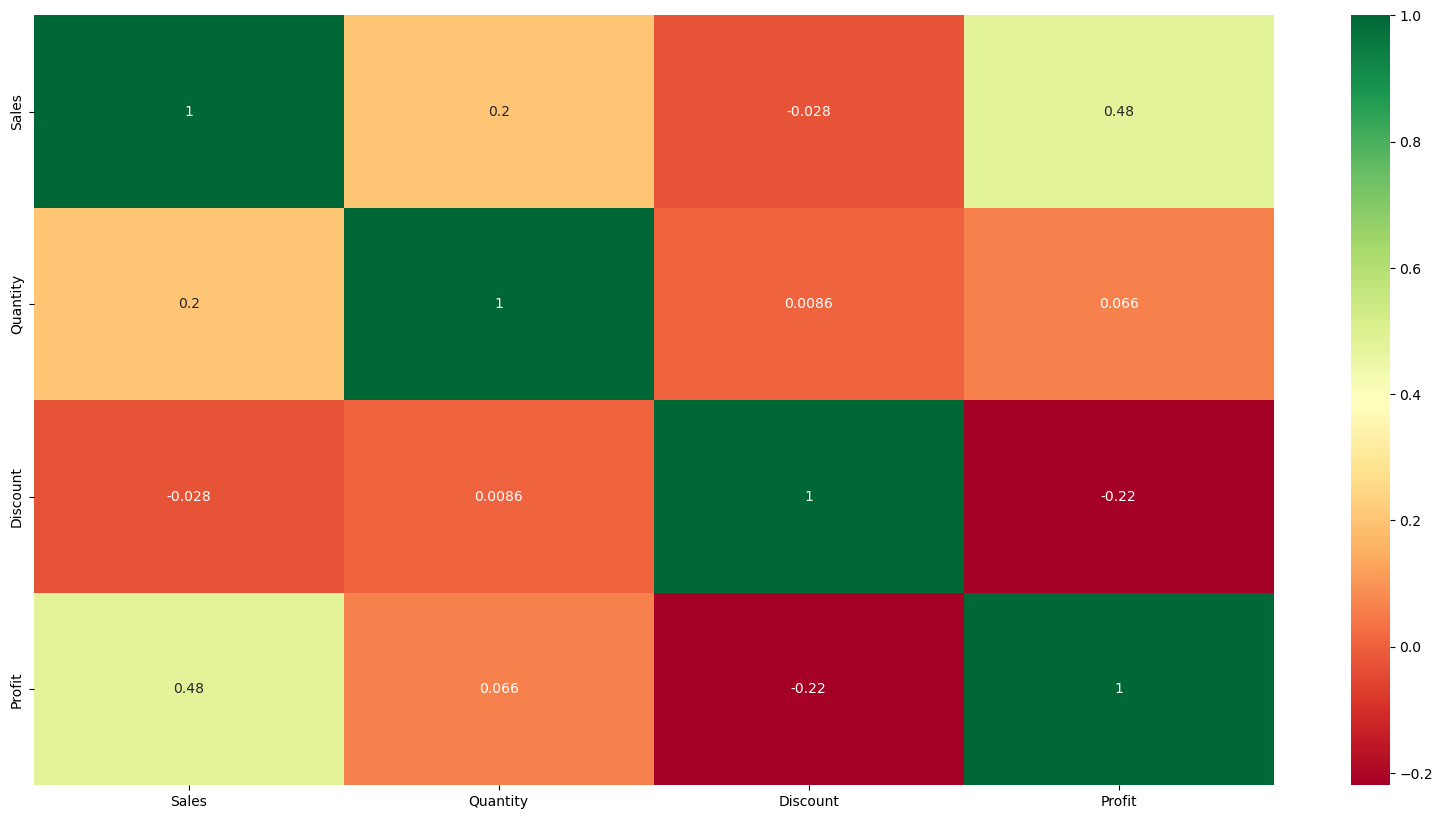

In [27]:
# Search for correlations between the variables in a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(superstore_df.corr(), annot=True, cmap='RdYlGn')

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

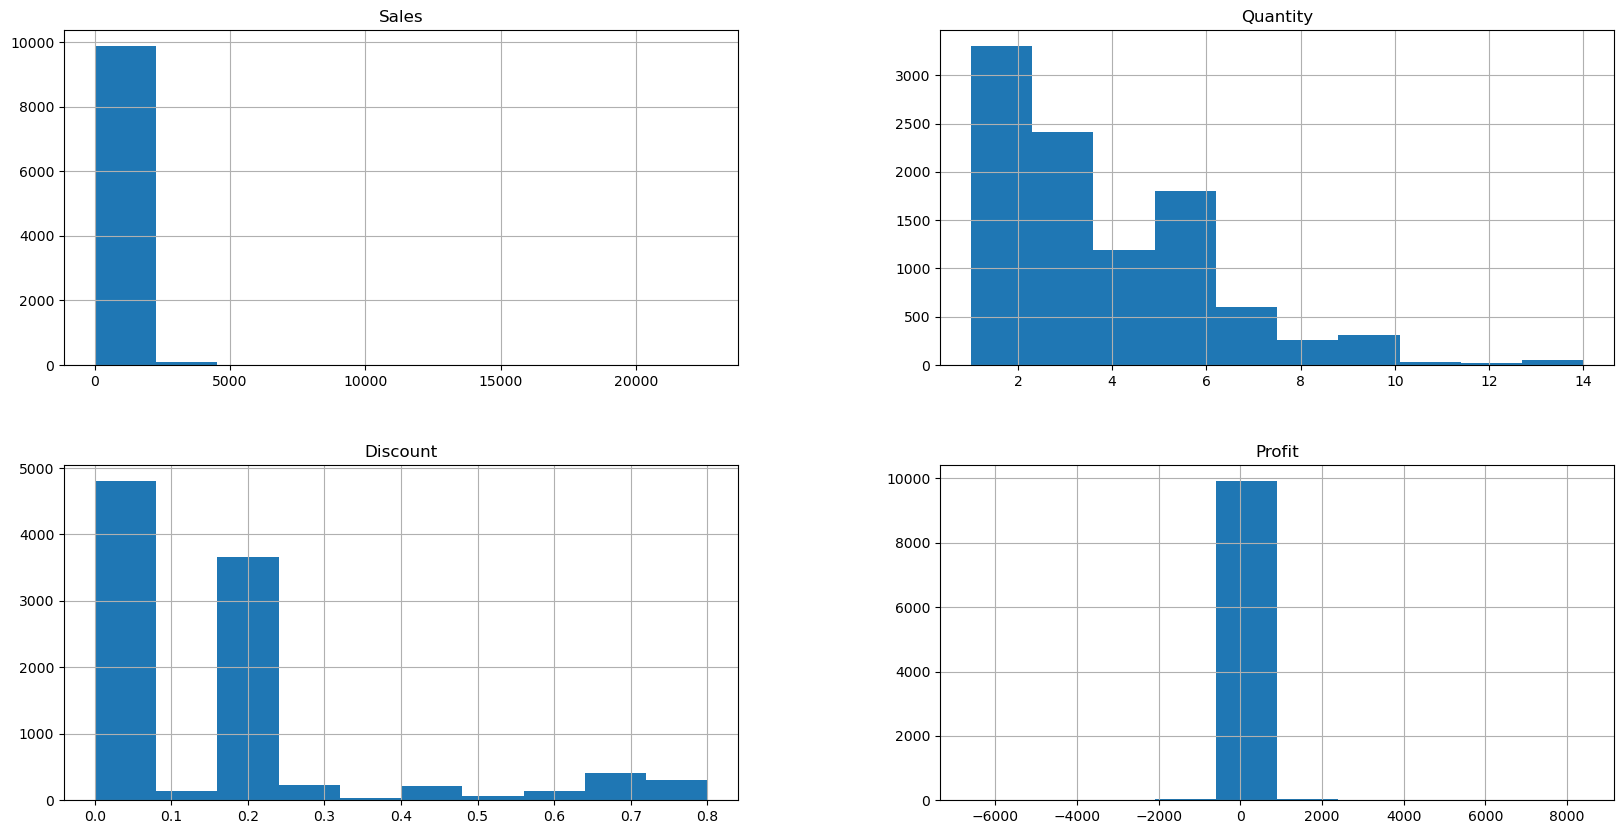

In [28]:
# Take a look of the distribution of the data
superstore_df.hist(figsize=(20, 10))

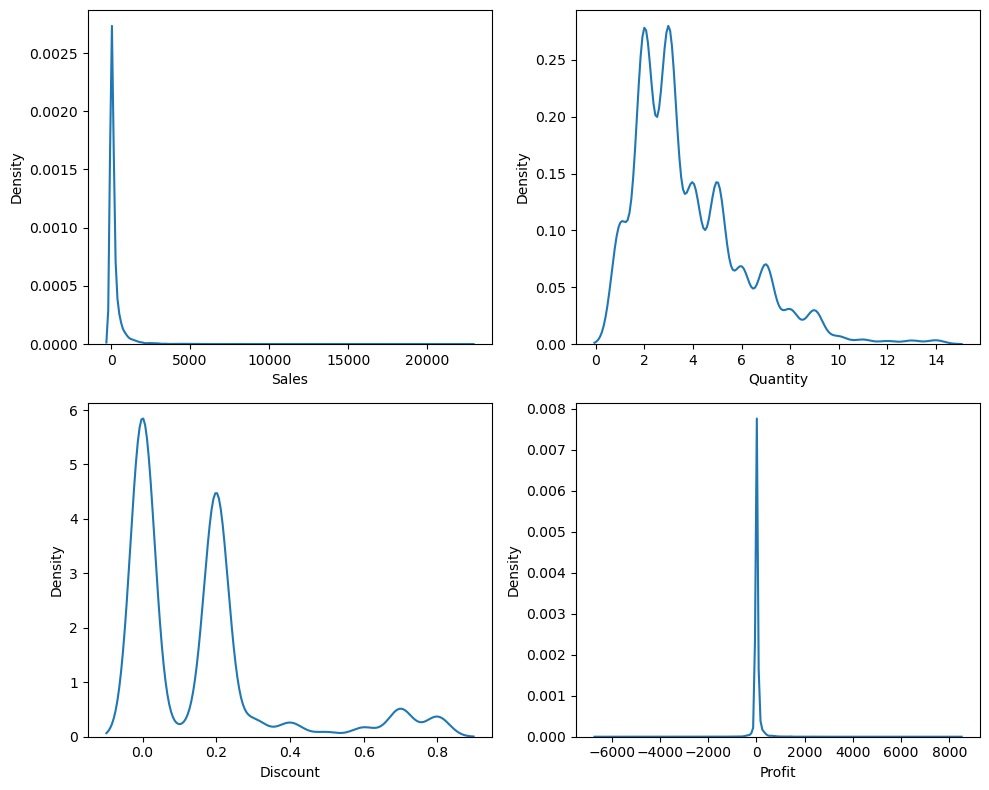

In [19]:
# Search for linearity between the variables
# These are Kernel density estimation plots for each combination of variables. 
# The data parameter specifies the DataFrame (superstore_df), and x specifies the column to plot.
columns = [['Sales', 'Quantity'],
           ['Discount', 'Profit']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i in range(2):
    for j in range(2):
        sns.kdeplot(data=superstore_df, x=columns[i][j], ax=axes[i][j])

plt.tight_layout()
plt.show()

## Clustering

When working with sales data, a common thing to do is to understand the customers' buying patterns using 3 parameters: Monetary (amount of money spent), Frequency (how frequently the customer bought something) Recency (how many days has passed from today to their last purchase).

These parameters are not given to us; we will have to calculate them.

### Sales Column

In [49]:
# Create a new DataFrame by grouping the customers based on their ID and summing the Sales column:
superstore_monetary = superstore_df.groupby('Customer ID')['Sales'].sum()
superstore_monetary = superstore_monetary.reset_index()
superstore_monetary.columns = ['Customer ID', 'Amount']
superstore_monetary.head()

,Customer ID,Amount
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


### Frequency

In [50]:
# Create a new DataFrame by considering How many unique Order IDs are there per customer:
superstore_frequency = superstore_df.groupby('Customer ID')['Order ID'].nunique()
superstore_frequency = superstore_frequency.reset_index()
superstore_frequency.columns = ['Customer ID', 'Frequency']
superstore_frequency.head()

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


### Recency

In [51]:
# Create a new DataFrame considering the last order date in the dataset:
superstore_recency = superstore_df.groupby('Customer ID')['Order Date'].max()
superstore_recency = superstore_recency.reset_index()
superstore_recency.columns = ['Customer ID', 'Last Order Date']
superstore_recency.head()

,Customer ID,Last Order Date
0,AA-10315,9/15/2014
1,AA-10375,9/7/2017
2,AA-10480,8/26/2016
3,AA-10645,9/4/2016
4,AB-10015,3/7/2014


In [52]:
### Concatenate / Merge Monetary, Frequency and Recency dataframes
mfr_df = pd.merge(superstore_monetary, superstore_frequency, on='Customer ID')
mfr_df = pd.merge(mfr_df, superstore_recency, on='Customer ID')
display(mfr_df.head())


,Customer ID,Amount,Frequency,Last Order Date
0,AA-10315,5563.560,5,9/15/2014
1,AA-10375,1056.390,9,9/7/2017
2,AA-10480,1790.512,4,8/26/2016
3,AA-10645,5086.935,6,9/4/2016
4,AB-10015,886.156,3,3/7/2014


## Dealing with outliers


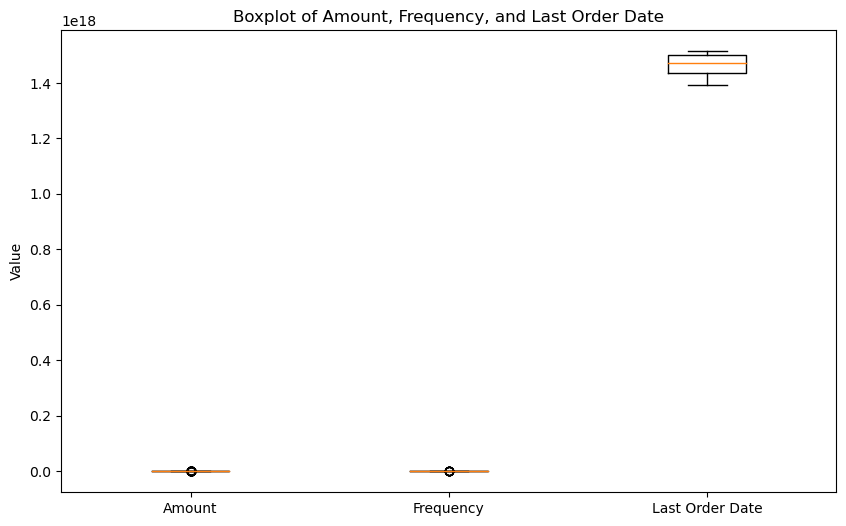

In [70]:


# Convert 'Last Order Date' column to numeric representation
superstore_recency['Last Order Date'] = pd.to_numeric(superstore_recency['Last Order Date'], errors='coerce')

# Create a boxplot for Amount, Frequency, and Last Order Date
plt.figure(figsize=(10, 6))
plt.boxplot([superstore_monetary['Amount'], superstore_frequency['Frequency'], superstore_recency['Last Order Date']],
            labels=['Amount', 'Frequency', 'Last Order Date'])
plt.ylabel('Value')
plt.title('Boxplot of Amount, Frequency, and Last Order Date')
plt.show()


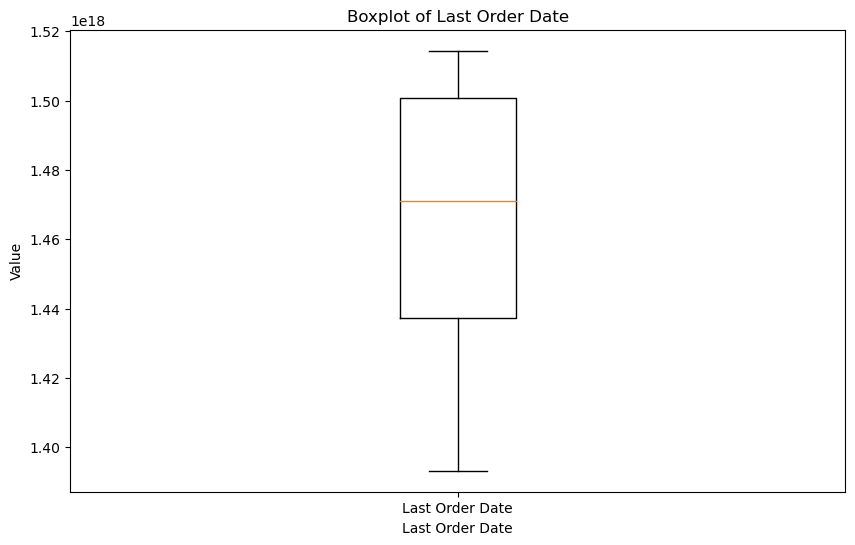

In [67]:
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_recency['Last Order Date'], labels=['Last Order Date'])
plt.ylabel('Value')
plt.xlabel('Last Order Date')
plt.title('Boxplot of Last Order Date')
plt.show()

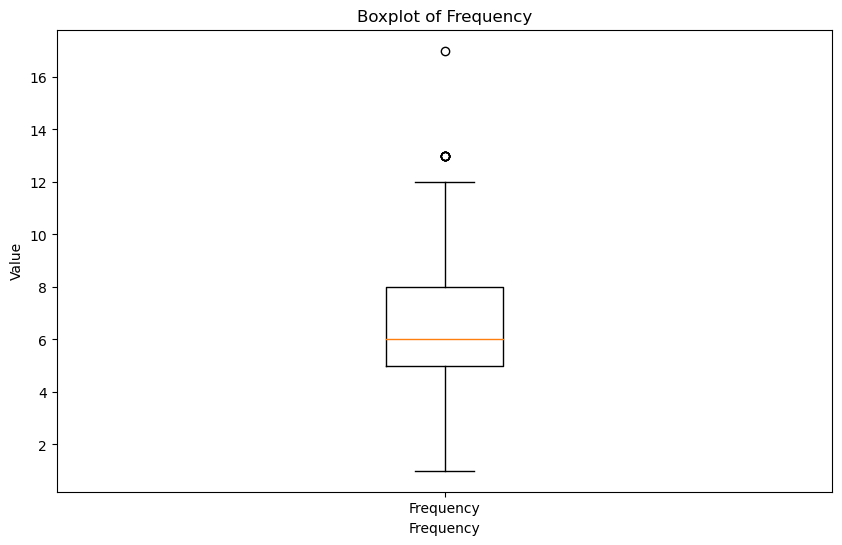

In [69]:
plt.figure(figsize=(10, 6))
plt.boxplot(superstore_frequency['Frequency'], labels=['Frequency'])
plt.ylabel('Value')
plt.xlabel('Frequency')
plt.title('Boxplot of Frequency')
plt.show()

### Encoding cathegorical variables

In [ ]:
cleaned_df.head()

In [ ]:
# Use get_dummies for encoding categorical variables with unique column names
new_season = pd.get_dummies(cleaned_df['month'], prefix='month', drop_first=False)
new_weather = pd.get_dummies(cleaned_df['weather'], prefix='weather', drop_first=False)
new_year = pd.get_dummies(cleaned_df['year'], prefix='year', drop_first=False)

# Drop the old columns
cleaned_df.drop(['month', 'weather', 'year'], axis=1, inplace=True)

# Concatenate the encoded columns with the original dataframe
cleaned_df_encoded = pd.concat([cleaned_df, new_season, new_weather, new_year], axis=1)

In [ ]:
# weekday is also a categorical variable. 
# We will encode them with LabelEncoder and OneHotEncoder
# LabelEncoder
le = LabelEncoder()
cleaned_df_encoded['weekday'] = le.fit_transform(cleaned_df_encoded['weekday'])

ohe_weekday = OneHotEncoder()
weekday_encoded = ohe_weekday.fit_transform(cleaned_df_encoded['weekday'].values.reshape(-1, 1)).toarray()
weekday_df = pd.DataFrame(weekday_encoded, columns=["weekday_" + str(int(i)) for i in range(weekday_encoded.shape[1])])

cleaned_df_encoded = pd.concat([cleaned_df_encoded, weekday_df], axis=1)
cleaned_df_encoded.drop(['weekday'], axis=1, inplace=True)

cleaned_df_encoded.head()

### Split the data into train and test sets

In [ ]:
# Split the data into train, validation, and test sets
train_df = cleaned_df_encoded[cleaned_df_encoded['year_0'] == 0]
test_df = cleaned_df_encoded[cleaned_df_encoded['year_0'] == 1]

# Drop the year columns
train_df.drop(['year_0', 'year_1'], axis=1, inplace=True)
test_df.drop(['year_0', 'year_1'], axis=1, inplace=True)

# Split the train data into train and validation sets
X_train = train_df.drop('count', axis=1)
y_train = train_df['count']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the test data into test and validation sets
X_test = test_df.drop('count', axis=1)
y_test = test_df['count']

X_test, X_val_test, y_test, y_val_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
train_df.info()

### Scale the data

In [ ]:
# Bring all the values to a uniform range
# Remember that the scaling is applied because the Gradient Descent method that we use to minimize our underlying cost function, converges much faster with scaling than without it.

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Train and fit the model and make predictions

In [ ]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_val_scaled)

In [ ]:
# Create a function that will calculate the metrics
def calculate_metrics(y_true, y_pred):
    print('R2 score: {}'.format(r2_score(y_true, y_pred)))
    print('Mean Squared Error: {}'.format(mean_squared_error(y_true, y_pred)))
    print('Mean Absolute Error: {}'.format(mean_absolute_error(y_true, y_pred)))
    print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print('Explained Variance Score: {}'.format(explained_variance_score(y_true, y_pred)))

# calculate the metrics
calculate_metrics(y_val, y_pred)

In [ ]:
# Create a function that will plot the residuals
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(20, 10))
    plt.scatter(y_true, residuals)
    plt.title('Residual plot')
    plt.xlabel('y_true')
    plt.ylabel('residuals')
    plt.show()

# call the function to plot the residuals
plot_residuals(y_val, y_pred)

Note: In addition to the metrics we have already calculated (R2 score, Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and Explained Variance Score), there are several other metrics that we can analyze to evaluate the performance of our machine learning model. Here are some commonly used metrics:

- Accuracy: Accuracy measures the overall correctness of your model's predictions. It is the ratio of the number of correct predictions to the total number of predictions.

- Precision: Precision is the proportion of true positive predictions out of all positive predictions. It measures the accuracy of positive predictions.

- Recall: Recall is the proportion of true positive predictions out of all actual positive instances. It measures the ability of the model to correctly identify positive instances.

- F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.

- ROC AUC Score: ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score is a performance metric for binary classification models. It measures the model's ability to discriminate between positive and negative classes.

- Confusion Matrix: A confusion matrix is a table that shows the counts of true positive, true negative, false positive, and false negative predictions. It provides a detailed breakdown of the model's performance across different classes.

- Classification Report: A classification report provides a summary of precision, recall, F1 score, and support for each class in a multi-class classification problem.

These metrics can provide additional insights into the performance of our machine learning model, especially in classification tasks. You can calculate these metrics using appropriate functions from libraries such as scikit-learn or other specialized evaluation libraries.